<a href="https://colab.research.google.com/github/fasihfast/Introduction_To_NLP/blob/main/Introduction_to_NLP_using_Sentiment_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Dataset**

In [144]:
import pandas as pd


In [145]:
df=pd.read_csv('sentimentdataset.csv',index_col=None)

In [146]:
df.drop(['Unnamed: 0.1',	'Unnamed: 0'],axis=1,inplace=True)

In [147]:
df

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes
0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30
1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10
2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40
3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25
...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,8/18/2017 18:20,Facebook,#ScienceFairWinner #HighSchoolScience,20,39
728,Attending a surprise birthday party organized ...,Happy,6/22/2018 14:15,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48
729,Successfully fundraising for a school charity ...,Happy,4/5/2019 17:30,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42
730,"Participating in a multicultural festival, cel...",Happy,2/29/2020 20:45,Facebook,#CulturalCelebration #HighSchoolUnity,21,43


#**Cleaning Text column by lower casing the text and removing punctuations**

In [148]:
import string

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    return text
df['Text']=df['Text'].apply(clean_text)
df.head(5)



,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25


# **Tokenization**

##Splitting the text in words using word_tokenize

In [149]:
import nltk
nltk.download('punkt_tab',quiet=True)
from nltk.tokenize import word_tokenize

df['Tokens']=df['Text'].apply(word_tokenize)
df.head(5)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]"
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]"
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]"
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]"
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton..."


#**Removing StopWords**
### cleaning the text with noise words (stopwords e.g a,an,the,not etc)

In [150]:
from nltk.corpus import stopwords
nltk.download('stopwords',quiet=True)
stopwords=set(stopwords.words('english'))
def remove_stopwords(token):
  arr=[]
  for word in token:
    if word not in stopwords:
      arr.append(word)
  return arr
df['filtered_tokens']=df['Tokens'].apply(remove_stopwords)
df.head(5)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens,filtered_tokens
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]"
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]"
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]","[finished, amazing, workout, 💪]"
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]"
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton...","[trying, new, recipe, dinner, tonight]"


#**Lemmatizing (stemming)**

## to extract the real word(increases to increase)

In [151]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet',quiet=True)
lemmanet=WordNetLemmatizer()
def mywordnet(token):
  arr=[]
  for word in token:
    arr.append(lemmanet.lemmatize(word))
  return arr

  # print("After",arr)
df['lemmatized_tokens']=df['filtered_tokens'].apply(mywordnet)

df.head(5)


,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens,filtered_tokens,lemmatized_tokens
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]"
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]","[traffic, terrible, morning]"
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[finished, amazing, workout, 💪]"
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]"
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton...","[trying, new, recipe, dinner, tonight]","[trying, new, recipe, dinner, tonight]"


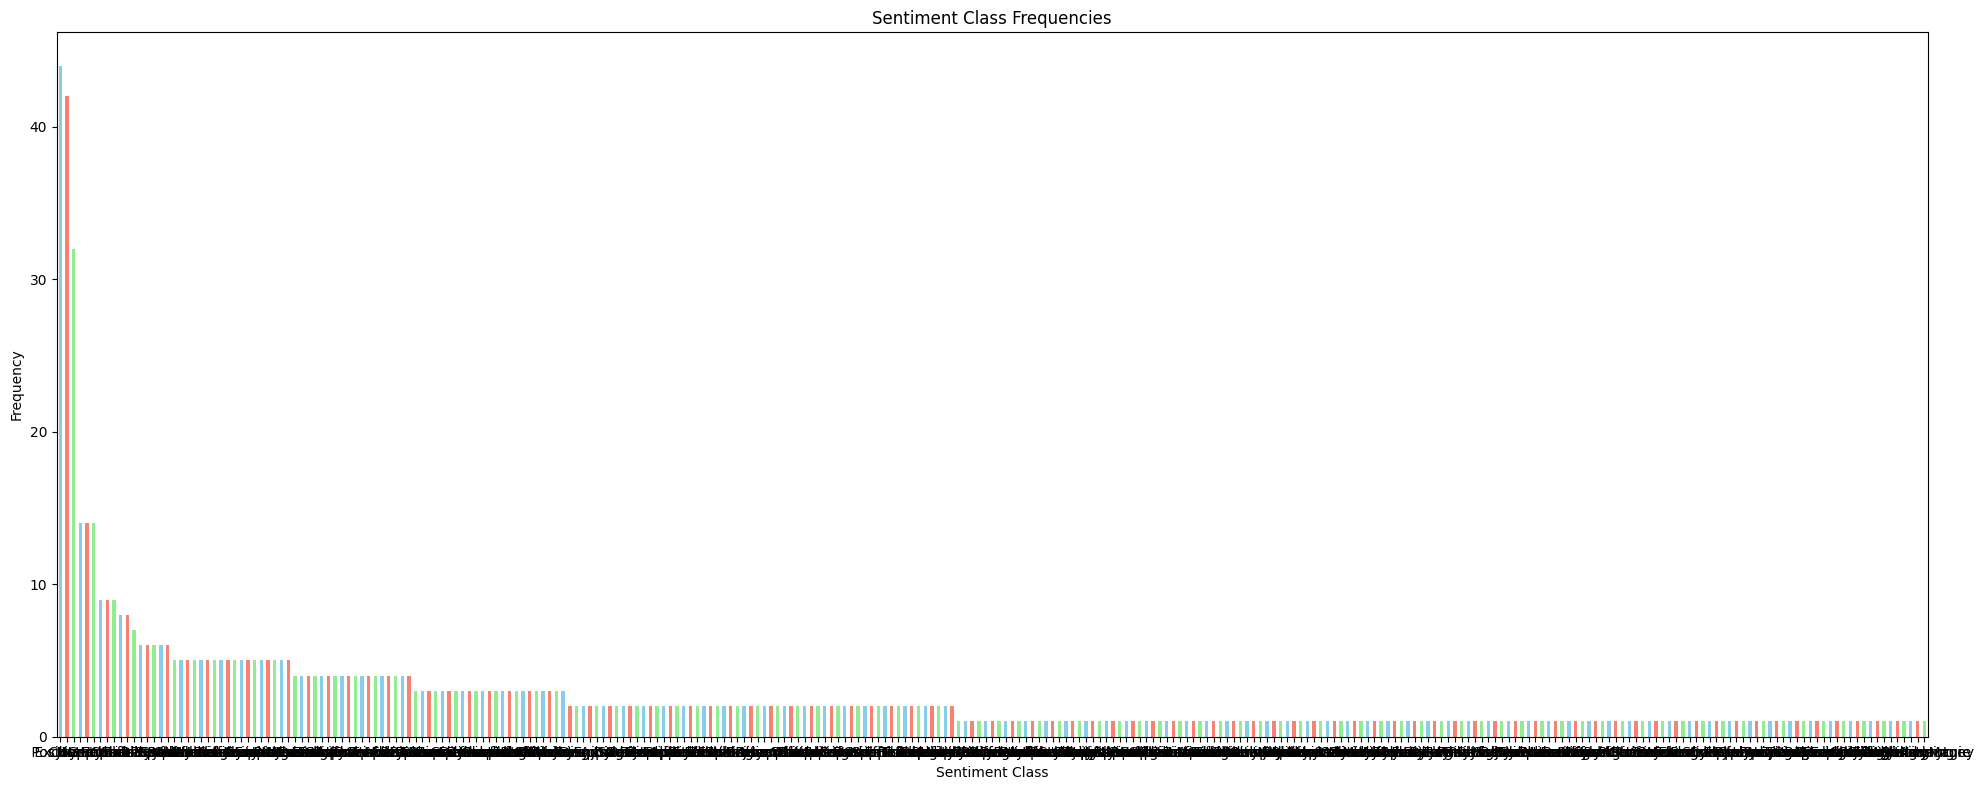

In [152]:
import matplotlib.pyplot as plt

# Calculate sentiment frequencies
sentiment_counts = df['Sentiment'].value_counts()

# Create the bar chart
plt.figure(figsize=(20, 8))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Class Frequencies')
plt.xlabel('Sentiment Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# **#Part-Of-Speech-Tagging (POS)**

##assigning lemmatized words with their parts of speech

In [153]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger_eng',quiet=True)
def pos_tag(token):
  return nltk.pos_tag(token)

df['pos_tags']=df['lemmatized_tokens'].apply(pos_tag)
df.head(5)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens,filtered_tokens,lemmatized_tokens,pos_tags
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]","[(enjoying, VBG), (beautiful, JJ), (day, NN), ..."
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]","[traffic, terrible, morning]","[(traffic, NN), (terrible, JJ), (morning, NN)]"
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[(finished, VBN), (amazing, VBG), (workout, NN..."
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[(excited, JJ), (upcoming, JJ), (weekend, NN),..."
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton...","[trying, new, recipe, dinner, tonight]","[trying, new, recipe, dinner, tonight]","[(trying, VBG), (new, JJ), (recipe, NN), (dinn..."


In [154]:
# def text_length():
import string
df['text_length']=df['Text'].astype(str).apply(len)
df.head(5)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens,filtered_tokens,lemmatized_tokens,pos_tags,text_length
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]","[(enjoying, VBG), (beautiful, JJ), (day, NN), ...",51
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]","[traffic, terrible, morning]","[(traffic, NN), (terrible, JJ), (morning, NN)]",51
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[(finished, VBN), (amazing, VBG), (workout, NN...",50
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[(excited, JJ), (upcoming, JJ), (weekend, NN),...",51
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton...","[trying, new, recipe, dinner, tonight]","[trying, new, recipe, dinner, tonight]","[(trying, VBG), (new, JJ), (recipe, NN), (dinn...",51


In [155]:
df['word_count']=df['lemmatized_tokens'].apply(len)
df.head(5)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens,filtered_tokens,lemmatized_tokens,pos_tags,text_length,word_count
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]","[(enjoying, VBG), (beautiful, JJ), (day, NN), ...",51,4
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]","[traffic, terrible, morning]","[(traffic, NN), (terrible, JJ), (morning, NN)]",51,3
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[(finished, VBN), (amazing, VBG), (workout, NN...",50,4
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[(excited, JJ), (upcoming, JJ), (weekend, NN),...",51,4
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton...","[trying, new, recipe, dinner, tonight]","[trying, new, recipe, dinner, tonight]","[(trying, VBG), (new, JJ), (recipe, NN), (dinn...",51,5


In [156]:
!pip install svgling

# **#Categoring Named Entities by chunking**



In [160]:
from nltk import ne_chunk # tokenize and POS Tagging before doing chunk
nltk.download('maxent_ne_chunker_tab',quiet=True)
nltk.download('words',quiet=True)

def chunking(token):
  text=ne_chunk(token)
  named_entities = []
  for subtree in text.subtrees():
          if subtree.label() != 'S':
              named_entities.append(subtree.leaves())
  return named_entities


df['chunk']=df['pos_tags'].apply(chunking)
df.head(5)


,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens,filtered_tokens,lemmatized_tokens,pos_tags,text_length,word_count,chunk
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]","[(enjoying, VBG), (beautiful, JJ), (day, NN), ...",51,4,[]
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]","[traffic, terrible, morning]","[(traffic, NN), (terrible, JJ), (morning, NN)]",51,3,[]
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[(finished, VBN), (amazing, VBG), (workout, NN...",50,4,[]
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[(excited, JJ), (upcoming, JJ), (weekend, NN),...",51,4,[]
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton...","[trying, new, recipe, dinner, tonight]","[trying, new, recipe, dinner, tonight]","[(trying, VBG), (new, JJ), (recipe, NN), (dinn...",51,5,[]


[('googles', 'NNS'), ('ceo', 'VBP'), ('sundar', 'NN'), ('pichai', 'NN'), ('introduced', 'VBD'), ('the', 'DT'), ('new', 'JJ'), ('pixel', 'NN'), ('at', 'IN'), ('minnesota', 'JJ'), ('roi', 'NN'), ('centre', 'NN'), ('event', 'NN')]


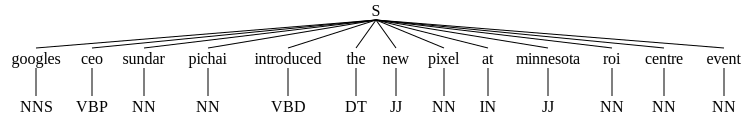

In [157]:
# text = "Google's CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event" #importing chunk library from nltk
# from nltk import ne_chunk # tokenize and POS Tagging before doing chunk
# nltk.download('maxent_ne_chunker_tab',quiet=True)
# nltk.download('words',quiet=True)
# token = word_tokenize(text)
# for word in token:
#   token="".join(word.lower() for word in text if word not in string.punctuation).split(' ')
# # print(token)
# tags = nltk.pos_tag(token)
# print(tags)
# chunk = ne_chunk(tags)
# chunk



In [159]:
# from nltk import Tree
# named_entities = []

# for subtree in chunk:
#     if isinstance(subtree, Tree):  # <-- only process named entity subtrees
#         entity_name = " ".join([token for token, pos in subtree.leaves()])
#         entity_type = subtree.label()
#         named_entities.append((entity_name, entity_type))

# print(named_entities)


[]


<Axes: xlabel='word_count', ylabel='Count'>

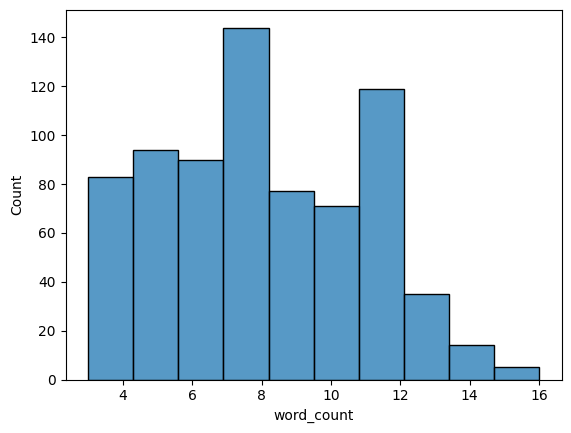

In [161]:
import seaborn as sns
sns.histplot(df['word_count'],bins=10)

In [162]:
df.head(5)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Tokens,filtered_tokens,lemmatized_tokens,pos_tags,text_length,word_count,chunk
0,enjoying a beautiful day at the park ...,Positive,1/15/2023 12:30,Twitter,#Nature #Park,15,30,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]","[(enjoying, VBG), (beautiful, JJ), (day, NN), ...",51,4,[]
1,traffic was terrible this morning ...,Negative,1/15/2023 8:45,Twitter,#Traffic #Morning,5,10,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]","[traffic, terrible, morning]","[(traffic, NN), (terrible, JJ), (morning, NN)]",51,3,[]
2,just finished an amazing workout 💪 ...,Positive,1/15/2023 15:45,Instagram,#Fitness #Workout,20,40,"[just, finished, an, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[finished, amazing, workout, 💪]","[(finished, VBN), (amazing, VBG), (workout, NN...",50,4,[]
3,excited about the upcoming weekend getaway ...,Positive,1/15/2023 18:20,Facebook,#Travel #Adventure,8,15,"[excited, about, the, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]","[(excited, JJ), (upcoming, JJ), (weekend, NN),...",51,4,[]
4,trying out a new recipe for dinner tonight ...,Neutral,1/15/2023 19:55,Instagram,#Cooking #Food,12,25,"[trying, out, a, new, recipe, for, dinner, ton...","[trying, new, recipe, dinner, tonight]","[trying, new, recipe, dinner, tonight]","[(trying, VBG), (new, JJ), (recipe, NN), (dinn...",51,5,[]


In [168]:
df['lemmatized_tokens_str']=df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# **#TF_IDF Vectorizing (Word-Embedding)**

###Converting the string column into a numbered (Word Embedding) so that ML model can be trained

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))

tfidfmatrix=vectorizer.fit_transform(df['lemmatized_tokens_str'])

#**Splitting the dataset for Sentiment Analysis Prediction and Trained logistic Regression and Naive Bayes for this Classification Problem**

In [173]:
from sklearn.model_selection import train_test_split

# Assuming 'tfidf_matrix' is already created from a previous step
# and is available in the current environment.

# Prepare features (X) and target variable (y)
X = tfidfmatrix
y = df['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (585, 1000)
X_test shape: (147, 1000)
y_train shape: (585,)
y_test shape: (147,)


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Initialize the models
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
nb_model = MultinomialNB()

# Train the models
logreg_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Make predictions
logreg_predictions = logreg_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

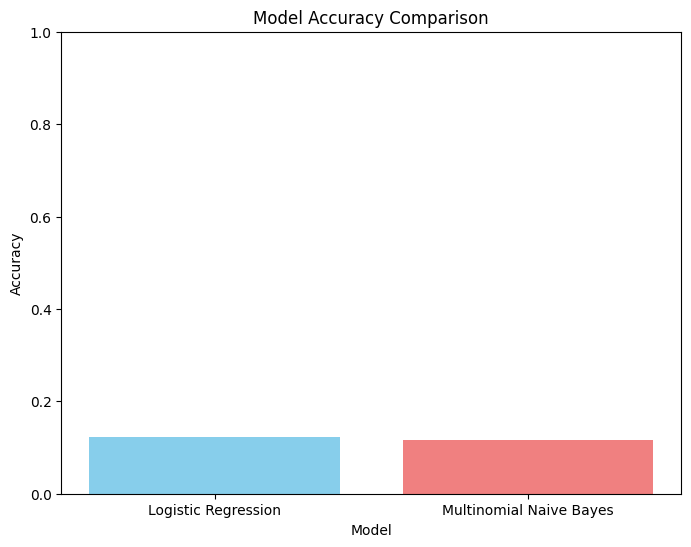

In [175]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming logreg_predictions, nb_predictions, and y_test are already available

# Calculate accuracy scores
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Model names
model_names = ["Logistic Regression", "Multinomial Naive Bayes"]

# Accuracy scores
accuracy_scores = [logreg_accuracy, nb_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightcoral'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()